In [14]:
%pip install -q numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


TASK TWO - Dataset Collection & Preparation

Load dataset into a DataFrame

In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["MedHouseVal"] = housing.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Save a local copy (counts as “dataset collection”)

In [16]:
import os

os.makedirs("../data", exist_ok=True)
df.to_csv("../data/housing.csv", index=False)
print("Saved to ../data/housing.csv")

Saved to ../data/housing.csv


Check shape + columns

In [17]:
print("Shape:", df.shape)

print(df.columns)

Shape: (20640, 9)
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='str')


Check data types and non-null counts

In [18]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Check missing values

In [19]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Check duplicate rows

In [20]:
df.duplicated().sum()

np.int64(0)

Quick summary statistics

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


Outlier scan 

In [22]:
df.quantile([0.01, 0.99]).T

,0.01,0.99
MedInc,1.069631,10.596540
HouseAge,4.000000,52.000000
AveRooms,2.581133,10.357033
AveBedrms,0.872840,2.127541
Population,88.000000,5805.830000
AveOccup,1.536686,5.394812
Latitude,32.680000,40.626100
Longitude,-123.220000,-116.290000
MedHouseVal,0.500000,5.000010


Target distribution (MedHouseVal)

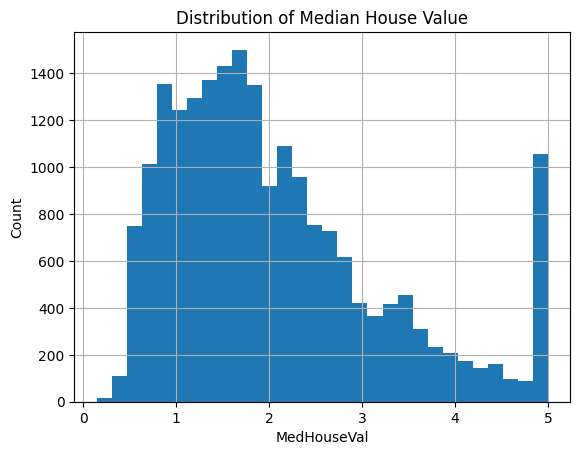

In [23]:
import matplotlib.pyplot as plt

plt.figure()
df["MedHouseVal"].hist(bins=30)
plt.title("Distribution of Median House Value")
plt.xlabel("MedHouseVal")
plt.ylabel("Count")
plt.show()

Correlation heatmap

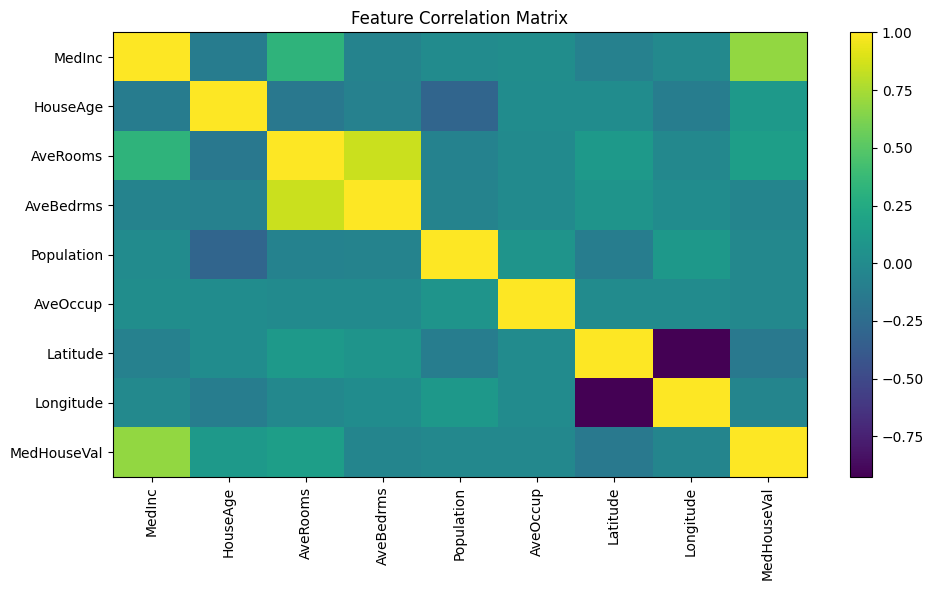

In [24]:
import numpy as np

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

Relationship checks

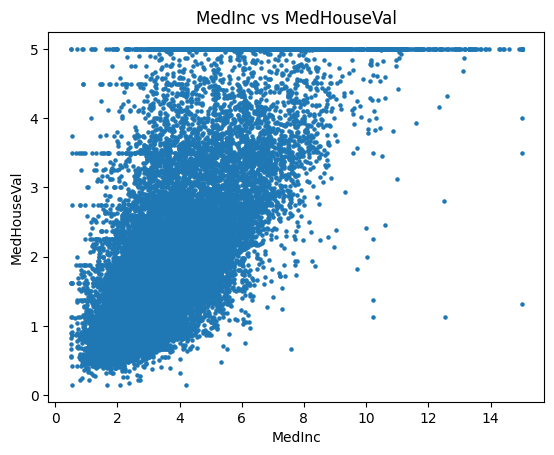

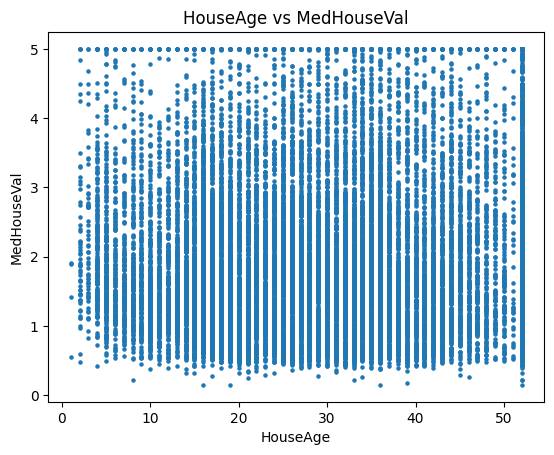

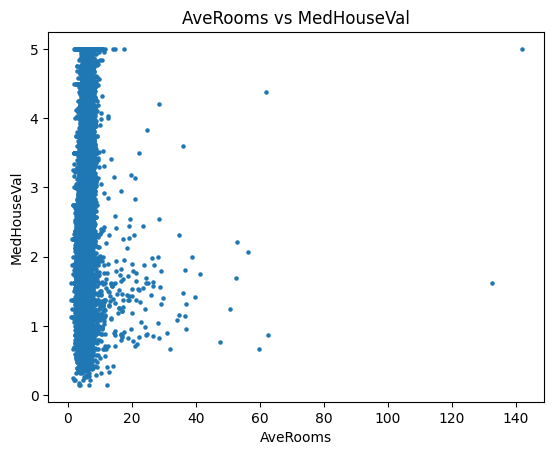

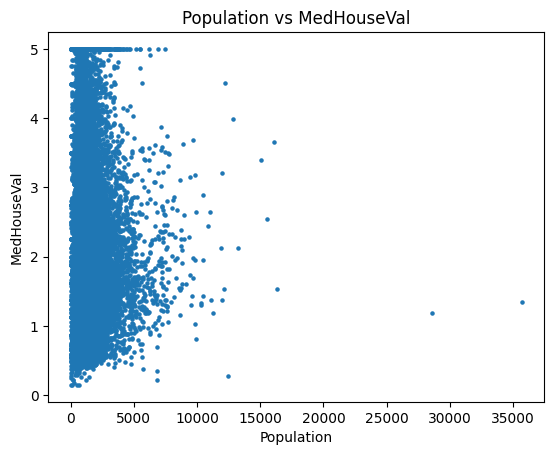

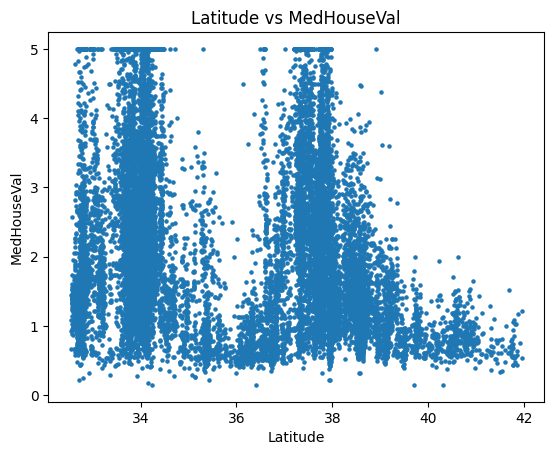

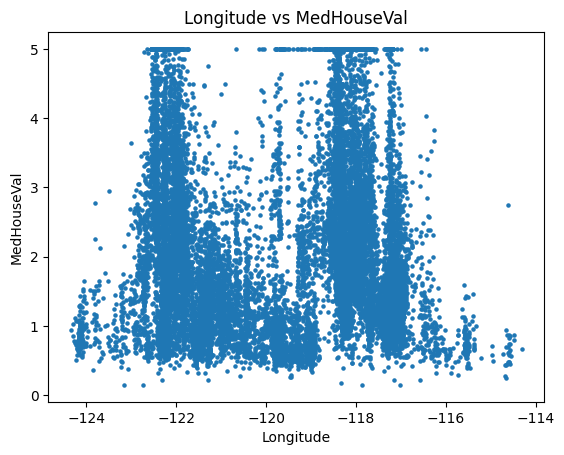

In [25]:
for col in ["MedInc", "HouseAge", "AveRooms", "Population", "Latitude", "Longitude"]:
    plt.figure()
    plt.scatter(df[col], df["MedHouseVal"], s=5)
    plt.title(f"{col} vs MedHouseVal")
    plt.xlabel(col)
    plt.ylabel("MedHouseVal")
    plt.show()

Identify strongest correlations with target

In [26]:
corr_target = corr["MedHouseVal"].sort_values(ascending=False)
corr_target

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64